## 1. Load the Dataset and Clean the Data

In this section, we load the `train.csv` and `test.csv` files. Then, we check for missing values and duplicates, and remove them if found. Cleaning is essential to ensure that our model gets quality data.


In [ ]:
import pandas as pd

# Set the base path
base_path = '/content/drive/MyDrive/Fake_News/'

# 1. Load datasets
print("Loading datasets...")
train_df = pd.read_csv(base_path + 'train.csv')
test_df = pd.read_csv(base_path + 'test.csv')

print("\n=== INITIAL DATASET SHAPES ===")
print("Train:", train_df.shape)
print("Test:", test_df.shape)

# 2. Check for missing values
print("\n=== MISSING VALUES BEFORE CLEANING ===")
print("Train missing values:")
print(train_df.isnull().sum())
print("\nTest missing values:")
print(test_df.isnull().sum())

# 3. Handle missing data
train_df = train_df.fillna('')
test_df = test_df.fillna('')

print("\n=== MISSING VALUES AFTER CLEANING ===")
print("Train missing values:")
print(train_df.isnull().sum())
print("\nTest missing values:")
print(test_df.isnull().sum())

# 4. Check for duplicates
print("\n=== DUPLICATES BEFORE REMOVAL ===")
print("Train duplicates:", train_df.duplicated().sum())
print("Test duplicates:", test_df.duplicated().sum())

# 5. Remove duplicates
train_df = train_df.drop_duplicates()
test_df = test_df.drop_duplicates()

print("\n=== DUPLICATES AFTER REMOVAL ===")
print("Train duplicates:", train_df.duplicated().sum())
print("Test duplicates:", test_df.duplicated().sum())

# Final check
print("\n=== FINAL DATASET SHAPES ===")
print("Train:", train_df.shape)
print("Test:", test_df.shape)

print("\nTask i) completed successfully!")

Loading datasets...

=== INITIAL DATASET SHAPES ===
Train: (20800, 5)
Test: (5200, 4)

=== MISSING VALUES BEFORE CLEANING ===
Train missing values:
id           0
title      558
author    1957
text        39
label        0
dtype: int64

Test missing values:
id          0
title     122
author    503
text        7
dtype: int64

=== MISSING VALUES AFTER CLEANING ===
Train missing values:
id        0
title     0
author    0
text      0
label     0
dtype: int64

Test missing values:
id        0
title     0
author    0
text      0
dtype: int64

=== DUPLICATES BEFORE REMOVAL ===
Train duplicates: 0
Test duplicates: 0

=== DUPLICATES AFTER REMOVAL ===
Train duplicates: 0
Test duplicates: 0

=== FINAL DATASET SHAPES ===
Train: (20800, 5)
Test: (5200, 4)

Task i) completed successfully!


## 2. Exploratory Data Analysis (EDA)

Here we analyze the dataset to understand the distribution of fake and real news, check for author/article stats, and visualize important insights.


=== FIRST 5 ROWS ===
   id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  char_count  \
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1        4930   
1  Ever get the feeling your life circles the rou...      0        4160   
2  Why the Truth Might Get You Fired October 29, ...      1        7692   
3  Videos 15 Civilians Killed In Single US Airstr...      1        3237   
4  Print \nAn Iranian woman has been sentenced to...      1         938   

   word_count  sentence_count  
0         943  

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


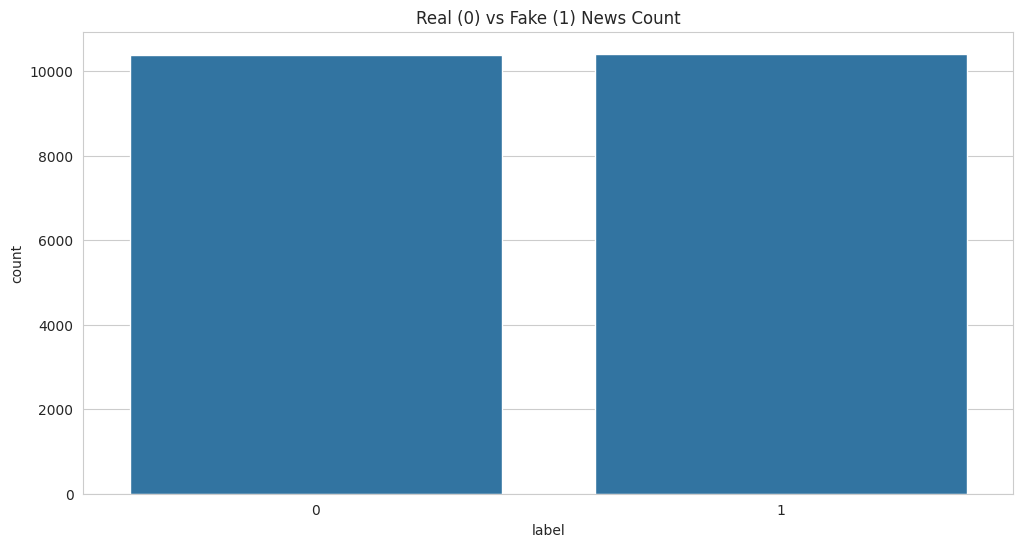


=== 2. AUTHOR ANALYSIS ===

Top 10 authors overall:
author
                       1957
Pam Key                 243
admin                   193
Jerome Hudson           166
Charlie Spiering        141
John Hayward            140
Katherine Rodriguez     124
Warner Todd Huston      122
Ian Hanchett            119
Breitbart News          118
Name: count, dtype: int64

Top 5 authors for FAKE news (label=1):
author
               1931
admin           193
Pakalert         86
Eddy Lavine      85
Starkman         84
Name: count, dtype: int64

Top 5 authors for REAL news (label=0):
author
Pam Key                242
Jerome Hudson          166
Charlie Spiering       141
John Hayward           140
Katherine Rodriguez    124
Name: count, dtype: int64

=== 3. TITLE WORD CLOUDS ===


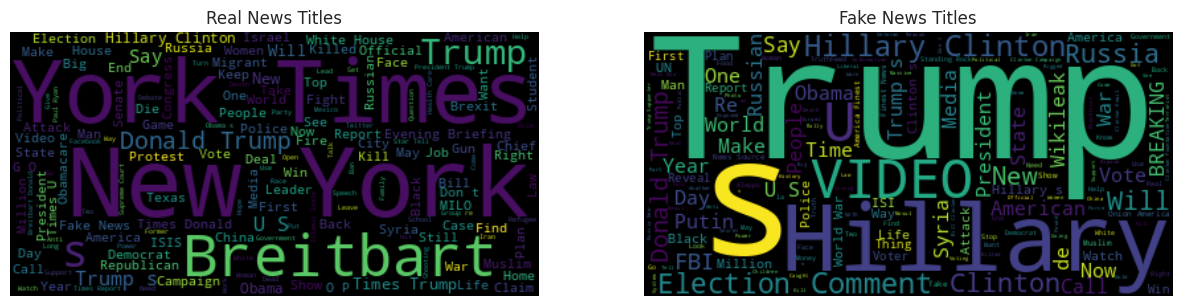


=== 4. CORRELATION ANALYSIS ===


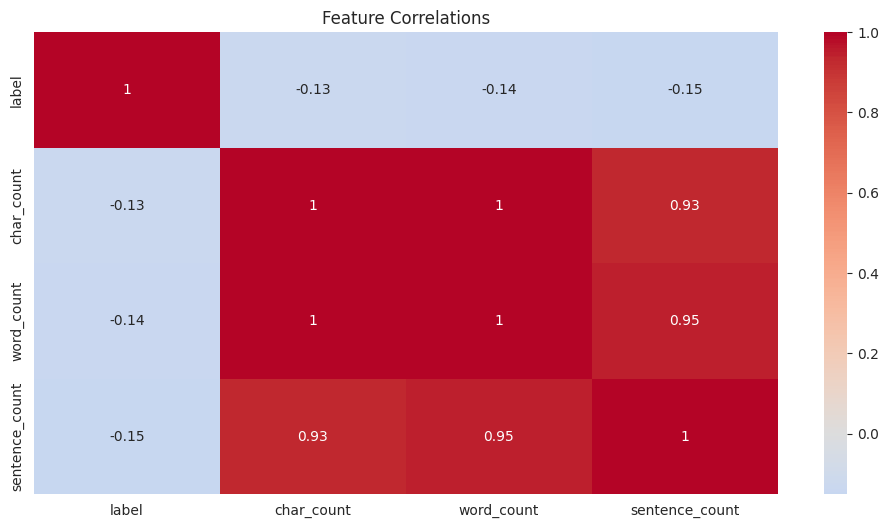


=== 5. SENTIMENT ANALYSIS ===

Sentiment by label:
label
0    0.073558
1    0.069016
Name: sentiment, dtype: float64


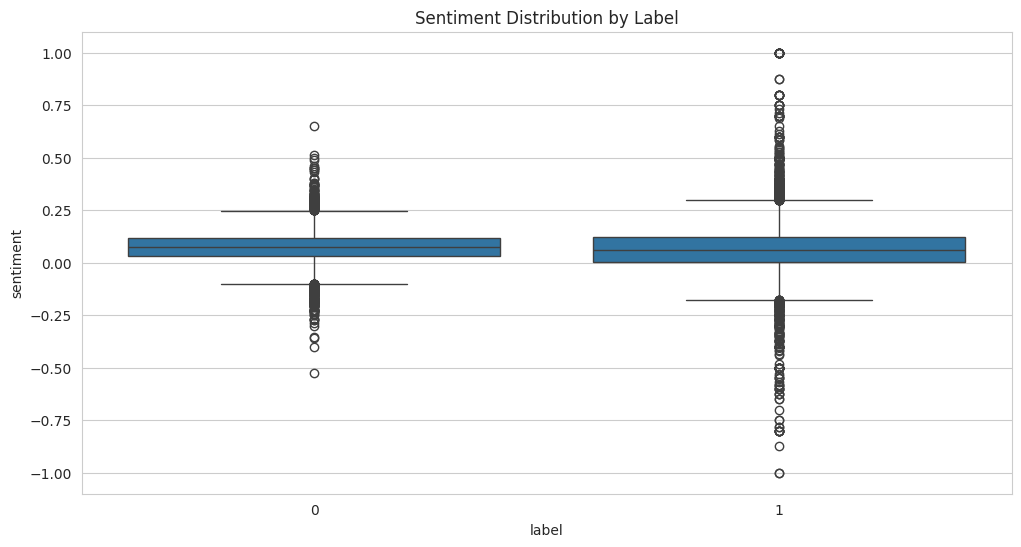

In [ ]:
# Import all required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from wordcloud import WordCloud
from textblob import TextBlob  # For sentiment analysis

# Download NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')  # For POS tagging
nltk.download('punkt_tab')

# Set visual style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# --- 1. BASIC OVERVIEW ---
print("=== FIRST 5 ROWS ===")
print(train_df.head())

# Plot label distribution
sns.countplot(x='label', data=train_df)
plt.title("Real (0) vs Fake (1) News Count")
plt.show()

# --- 2. AUTHOR ANALYSIS ---
print("\n=== 2. AUTHOR ANALYSIS ===")
print("\nTop 10 authors overall:")
print(train_df['author'].value_counts().head(10))

print("\nTop 5 authors for FAKE news (label=1):")
print(train_df[train_df['label']==1]['author'].value_counts().head(5))

print("\nTop 5 authors for REAL news (label=0):")
print(train_df[train_df['label']==0]['author'].value_counts().head(5))

# --- 3. TITLE WORD CLOUDS ---
print("\n=== 3. TITLE WORD CLOUDS ===")
real_titles = " ".join(title for title in train_df[train_df['label']==0]['title'].fillna(""))
fake_titles = " ".join(title for title in train_df[train_df['label']==1]['title'].fillna(""))

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
WordCloud(width=800, height=400, background_color='white').generate(real_titles)
plt.imshow(WordCloud().generate(real_titles), interpolation='bilinear')
plt.title("Real News Titles")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(WordCloud().generate(fake_titles), interpolation='bilinear')
plt.title("Fake News Titles")
plt.axis('off')
plt.show()

# --- 4. CORRELATION ANALYSIS ---
train_df['char_count'] = train_df['text'].apply(len)
train_df['word_count'] = train_df['text'].apply(lambda x: len(word_tokenize(str(x))))
train_df['sentence_count'] = train_df['text'].apply(lambda x: len(sent_tokenize(str(x))))

print("\n=== 4. CORRELATION ANALYSIS ===")
corr_matrix = train_df[['label', 'char_count', 'word_count', 'sentence_count']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Feature Correlations")
plt.show()

# --- 5. SENTIMENT ANALYSIS ---

print("\n=== 5. SENTIMENT ANALYSIS ===")
train_df['sentiment'] = train_df['text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
print("\nSentiment by label:")
print(train_df.groupby('label')['sentiment'].mean())

sns.boxplot(x='label', y='sentiment', data=train_df)
plt.title("Sentiment Distribution by Label")
plt.show()

## 3. Text Statistics

We calculate the number of characters, words, and sentences in the text column. This helps us understand the structure and complexity of the news articles.



=== TEXT LENGTH ANALYSIS ===
=== FIRST 5 ARTICLES' STATS ===
   id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  char_count  \
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1        4930   
1  Ever get the feeling your life circles the rou...      0        4160   
2  Why the Truth Might Get You Fired October 29, ...      1        7692   
3  Videos 15 Civilians Killed In Single US Airstr...      1        3237   
4  Print \nAn Iranian woman has been sentenced to...      1         938   

   wor

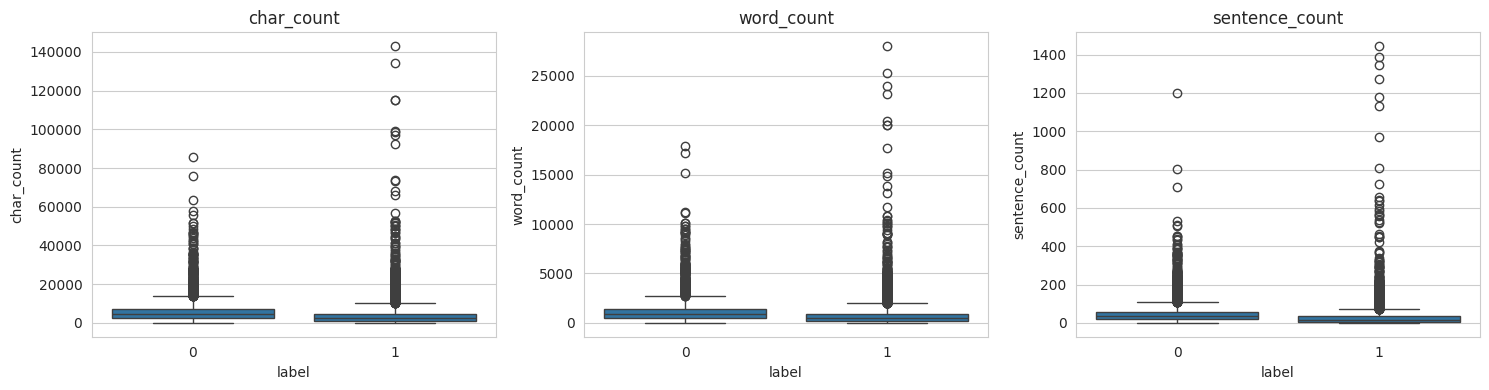


=== SAMPLE VERIFICATION ===
Sample text (first 100 chars): House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus o...
Manual char count: 4930
Manual word count: 943
Manual sentence count: 37


In [10]:
# --- TEXT LENGTH ANALYSIS ---
print("\n=== TEXT LENGTH ANALYSIS ===")
train_df['char_count'] = train_df['text'].apply(len)
train_df['word_count'] = train_df['text'].apply(lambda x: len(word_tokenize(str(x))))
train_df['sentence_count'] = train_df['text'].apply(lambda x: len(sent_tokenize(str(x))))

# --- Display Results ---
print("=== FIRST 5 ARTICLES' STATS ===")
print(train_df.head())

print("\n=== SUMMARY STATISTICS ===")
print(train_df[['char_count', 'word_count', 'sentence_count']].describe())

print("\n=== AVERAGE BY LABEL ===")
print(train_df.groupby('label')[['char_count', 'word_count', 'sentence_count']].mean())

# Compare by label
print("\nAverage length by label:")
print(train_df.groupby('label')[['char_count', 'word_count', 'sentence_count']].mean())

# Visualize
plt.figure(figsize=(15, 4))
for i, col in enumerate(['char_count', 'word_count', 'sentence_count']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='label', y=col, data=train_df)
    plt.title(col)
plt.tight_layout()
plt.show()


# --- Quick Verification ---
sample_text = train_df['text'].iloc[0]
print("\n=== SAMPLE VERIFICATION ===")
print(f"Sample text (first 100 chars): {sample_text[:100]}...")
print(f"Manual char count: {len(sample_text)}")
print(f"Manual word count: {len(nltk.word_tokenize(sample_text))}")
print(f"Manual sentence count: {len(nltk.sent_tokenize(sample_text))}")

## 4. Text Preprocessing

In this section, we clean and normalize the text data using the following NLP techniques:
1. Convert to lowercase
2. Tokenization
3. Remove special characters
4. Remove stop words and punctuations
5. Stemming
6. Lemmatization


### Lowercasing
Convert all text to lowercase to ensure uniformity.

In [11]:
# --- Lowercase Conversion ---
print("=== BEFORE CONVERSION (SAMPLE) ===")
print("Original text (first 100 chars):")
print(train_df['text'].iloc[0][:100] + "...\n")

# Apply lowercase to text column
train_df['text_lower'] = train_df['text'].str.lower()

print("=== AFTER CONVERSION (SAMPLE) ===")
print("Lowercased text (first 100 chars):")
print(train_df['text_lower'].iloc[0][:100] + "...\n")

# --- Verification ---
print("=== CASE VERIFICATION ===")
sample_text = train_df['text'].iloc[0]
sample_lower = train_df['text_lower'].iloc[0]

print("Contains uppercase in original?",
      any(c.isupper() for c in sample_text))
print("Contains uppercase in processed?",
      any(c.isupper() for c in sample_lower))

=== BEFORE CONVERSION (SAMPLE) ===
Original text (first 100 chars):
House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus o...

=== AFTER CONVERSION (SAMPLE) ===
Lowercased text (first 100 chars):
house dem aide: we didn’t even see comey’s letter until jason chaffetz tweeted it by darrell lucus o...

=== CASE VERIFICATION ===
Contains uppercase in original? True
Contains uppercase in processed? False


### Tokenization
Split the text into individual words (tokens).


In [12]:
# --- Tokenization ---
print("=== BEFORE TOKENIZATION (SAMPLE) ===")
print(train_df['text_lower'].iloc[0][:100] + "...\n")

# Apply word tokenization
train_df['tokens'] = train_df['text_lower'].apply(nltk.word_tokenize)

print("=== AFTER TOKENIZATION (SAMPLE) ===")
print("First 10 tokens:")
print(train_df['tokens'].iloc[0][:10])
print("\nTotal tokens in this article:", len(train_df['tokens'].iloc[0]))

# --- Verification ---
def verify_tokenization(original_text, token_list):
    reconstructed = ' '.join(token_list)
    return original_text.startswith(reconstructed[:50])  # Check first 50 chars

sample_idx = 0
print("\n=== TOKENIZATION VERIFICATION ===")
print("Original start:", train_df['text_lower'].iloc[sample_idx][:50])
print("Reconstructed start:", ' '.join(train_df['tokens'].iloc[sample_idx][:10]) + "...")
print("Match:", verify_tokenization(train_df['text_lower'].iloc[sample_idx],
                                 train_df['tokens'].iloc[sample_idx]))

=== BEFORE TOKENIZATION (SAMPLE) ===
house dem aide: we didn’t even see comey’s letter until jason chaffetz tweeted it by darrell lucus o...

=== AFTER TOKENIZATION (SAMPLE) ===
First 10 tokens:
['house', 'dem', 'aide', ':', 'we', 'didn', '’', 't', 'even', 'see']

Total tokens in this article: 942

=== TOKENIZATION VERIFICATION ===
Original start: house dem aide: we didn’t even see comey’s letter 
Reconstructed start: house dem aide : we didn ’ t even see...
Match: False


### Cleaning Text
Remove unwanted characters and common stopwords that do not add value to the model.


In [13]:
import pandas as pd
import re

# --- Remove Special Characters ---
print("=== BEFORE REMOVAL (SAMPLE TOKENS) ===")
print(train_df['tokens'].iloc[0][:10])  # Show first 10 tokens

def remove_special_chars(tokens):
    """Remove all non-alphanumeric characters from tokens"""
    clean_tokens = []
    for token in tokens:
        # Keep only letters and numbers (remove punctuation, symbols, etc.)
        clean_token = re.sub(r'[^a-zA-Z0-9]', '', token)
        # Only keep tokens that still have content after cleaning
        if clean_token:
            clean_tokens.append(clean_token)
    return clean_tokens

# Apply cleaning
train_df['cleaned_tokens'] = train_df['tokens'].apply(remove_special_chars)

print("\n=== AFTER REMOVAL (SAMPLE TOKENS) ===")
print(train_df['cleaned_tokens'].iloc[0][:10])

# --- Verification ---
def verify_cleaning(original_tokens, cleaned_tokens):
    """Check if special chars were properly removed"""
    special_chars = set("!@#$%^&*()_+-=[]{};':\",./<>?\\|`~")

    # Check original tokens contained special chars
    original_has_special = any(any(c in special_chars for c in token)
                              for token in original_tokens[:20])

    # Check cleaned tokens have no special chars
    cleaned_has_special = any(any(c in special_chars for c in token)
                         for token in cleaned_tokens[:20])

    return {
        'original_contained_special': original_has_special,
        'cleaned_has_special': cleaned_has_special,
        'tokens_removed': len(original_tokens) - len(cleaned_tokens)
    }

print("\n=== CLEANING VERIFICATION ===")
verification = verify_cleaning(train_df['tokens'].iloc[0], train_df['cleaned_tokens'].iloc[0])
print(f"Original had special chars: {verification['original_contained_special']}")
print(f"Cleaned has special chars: {verification['cleaned_has_special']}")
print(f"Tokens removed: {verification['tokens_removed']}")

=== BEFORE REMOVAL (SAMPLE TOKENS) ===
['house', 'dem', 'aide', ':', 'we', 'didn', '’', 't', 'even', 'see']

=== AFTER REMOVAL (SAMPLE TOKENS) ===
['house', 'dem', 'aide', 'we', 'didn', 't', 'even', 'see', 'comey', 's']

=== CLEANING VERIFICATION ===
Original had special chars: True
Cleaned has special chars: False
Tokens removed: 105


In [15]:
import pandas as pd
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
from ast import literal_eval

# --- Remove Stopwords & Punctuation ---
print("=== BEFORE REMOVAL (SAMPLE TOKENS) ===")
print(train_df['cleaned_tokens'].iloc[0][:15])  # Show first 15 tokens

# Get stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

def remove_stopwords_punct(tokens):
    """Remove both stopwords and punctuation tokens"""
    return [token for token in tokens
            if token not in stop_words and token not in punctuation]

# Apply cleaning
train_df['filtered_tokens'] = train_df['cleaned_tokens'].apply(remove_stopwords_punct)

print("\n=== AFTER REMOVAL (SAMPLE TOKENS) ===")
print(train_df['filtered_tokens'].iloc[0][:15])  # Show first 15 filtered tokens

# --- Verification ---
def verify_filtering(original_tokens, filtered_tokens):
    """Verify stopwords and punctuation were removed"""
    # Check if common stopwords were removed
    common_stopwords_present = any(token in stop_words for token in original_tokens[:20])

    # Check if punctuation tokens were removed
    punct_present = any(token in punctuation for token in original_tokens[:20])

    # Check if filtered tokens are clean
    filtered_has_stopwords = any(token in stop_words for token in filtered_tokens[:20])
    filtered_has_punct = any(token in punctuation for token in filtered_tokens[:20])

    return {
        'original_contained_stopwords': common_stopwords_present,
        'original_contained_punctuation': punct_present,
        'filtered_has_stopwords': filtered_has_stopwords,
        'filtered_has_punctuation': filtered_has_punct,
        'tokens_removed': len(original_tokens) - len(filtered_tokens)
    }

print("\n=== FILTERING VERIFICATION ===")
verification = verify_filtering((train_df['cleaned_tokens'].iloc[0]),
                              (train_df['filtered_tokens'].iloc[0]))
print(f"Original had stopwords: {verification['original_contained_stopwords']}")
print(f"Original had punctuation: {verification['original_contained_punctuation']}")
print(f"Filtered has stopwords: {verification['filtered_has_stopwords']}")
print(f"Filtered has punctuation: {verification['filtered_has_punctuation']}")
print(f"Tokens removed: {verification['tokens_removed']}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


=== BEFORE REMOVAL (SAMPLE TOKENS) ===
['house', 'dem', 'aide', 'we', 'didn', 't', 'even', 'see', 'comey', 's', 'letter', 'until', 'jason', 'chaffetz', 'tweeted']

=== AFTER REMOVAL (SAMPLE TOKENS) ===
['house', 'dem', 'aide', 'even', 'see', 'comey', 'letter', 'jason', 'chaffetz', 'tweeted', 'darrell', 'lucus', 'october', '30', '2016']

=== FILTERING VERIFICATION ===
Original had stopwords: True
Original had punctuation: False
Filtered has stopwords: False
Filtered has punctuation: False
Tokens removed: 402


### Stemming
Reduce words to their root forms using stemming.


In [16]:
from nltk.stem import PorterStemmer

# Initialize stemmer
stemmer = PorterStemmer()

# --- Stemming ---
print("=== BEFORE STEMMING (SAMPLE) ===")
print(train_df['filtered_tokens'].iloc[0][:10])  # Show first 10 filtered tokens

# Apply stemming
train_df['stemmed_tokens'] = train_df['filtered_tokens'].apply(
    lambda tokens: [stemmer.stem(token) for token in tokens]
)

print("\n=== AFTER STEMMING (SAMPLE) ===")
print(train_df['stemmed_tokens'].iloc[0][:10])

# --- Verification ---
def verify_stemming(original_tokens, stemmed_tokens):
    """Check if stemming worked correctly"""
    sample_pairs = list(zip(original_tokens[:5], stemmed_tokens[:5]))
    changes = sum(1 for orig, stem in sample_pairs if orig != stem)
    return {
        'sample_pairs': sample_pairs,
        'changed_words': changes,
        'change_percentage': f"{changes/len(sample_pairs)*100:.1f}%"
    }

print("\n=== STEMMING VERIFICATION ===")
verification = verify_stemming(train_df['filtered_tokens'].iloc[0],
                             train_df['stemmed_tokens'].iloc[0])
print("Sample word pairs (original → stemmed):")
for orig, stem in verification['sample_pairs']:
    print(f"{orig} → {stem}")
print(f"\nWords modified: {verification['changed_words']}/{len(verification['sample_pairs'])} "
      f"({verification['change_percentage']})")

=== BEFORE STEMMING (SAMPLE) ===
['house', 'dem', 'aide', 'even', 'see', 'comey', 'letter', 'jason', 'chaffetz', 'tweeted']

=== AFTER STEMMING (SAMPLE) ===
['hous', 'dem', 'aid', 'even', 'see', 'comey', 'letter', 'jason', 'chaffetz', 'tweet']

=== STEMMING VERIFICATION ===
Sample word pairs (original → stemmed):
house → hous
dem → dem
aide → aid
even → even
see → see

Words modified: 2/5 (40.0%)


### Lemmatization
Similar to stemming, but returns valid words instead of roots.


In [17]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# --- Lemmatization ---
print("=== BEFORE LEMMATIZATION (SAMPLE) ===")
print(train_df['filtered_tokens'].iloc[0][:10])  # First 10 filtered tokens

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

train_df['lemmatized_tokens'] = train_df['filtered_tokens'].apply(lemmatize_tokens)

print("\n=== AFTER LEMMATIZATION (SAMPLE) ===")
print(train_df['lemmatized_tokens'].iloc[0][:10])

# --- Verification ---
def verify_lemmatization(original_tokens, lemmatized_tokens):
    changes = []
    for orig, lemma in zip(original_tokens[:10], lemmatized_tokens[:10]):
        if orig != lemma:
            changes.append(f"{orig} → {lemma}")
    return changes

print("\n=== LEMMATIZATION VERIFICATION ===")
changes = verify_lemmatization(train_df['filtered_tokens'].iloc[0],
                             train_df['lemmatized_tokens'].iloc[0])
if changes:
    print("Changed words:")
    for change in changes:
        print(change)
else:
    print("No changes detected in first 10 tokens")

# Save results
train_df[['filtered_tokens', 'lemmatized_tokens']].to_csv('/content/drive/MyDrive/Fake_News/lemmatized_train.csv', index=False)

[nltk_data] Downloading package wordnet to /root/nltk_data...


=== BEFORE LEMMATIZATION (SAMPLE) ===
['house', 'dem', 'aide', 'even', 'see', 'comey', 'letter', 'jason', 'chaffetz', 'tweeted']

=== AFTER LEMMATIZATION (SAMPLE) ===
['house', 'dem', 'aide', 'even', 'see', 'comey', 'letter', 'jason', 'chaffetz', 'tweeted']

=== LEMMATIZATION VERIFICATION ===
No changes detected in first 10 tokens


##  Text Preprocessing
all in one


In [26]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download(['stopwords', 'wordnet', 'punkt'])

# --- 1. Lowercasing ---
print("=== BEFORE LOWERCASING (SAMPLE) ===")
print(train_df['text'].iloc[0][:100] + "...")  # Show first 100 chars

train_df['text_processed'] = train_df['text'].str.lower()  # Apply lowercasing

print("\n=== AFTER LOWERCASING (SAMPLE) ===")
print(train_df['text_processed'].iloc[0][:100] + "...\n")

# --- 2. Tokenization ---
train_df['tokens'] = train_df['text_processed'].apply(nltk.word_tokenize)

# --- 3. Remove Special Characters ---
def clean_tokens(tokens):
    return [re.sub(r'[^a-zA-Z0-9]', '', token) for token in tokens if re.sub(r'[^a-zA-Z0-9]', '', token)]

train_df['cleaned_tokens'] = train_df['tokens'].apply(clean_tokens)

# --- 4. Remove Stopwords/Punctuation ---
stop_words = set(stopwords.words('english'))
punctuations = set(string.punctuation)

def remove_stopwords(tokens):
    return [token for token in tokens if token not in stop_words and token not in punctuations]

train_df['filtered_tokens'] = train_df['cleaned_tokens'].apply(remove_stopwords)

# --- 5. Stemming ---
stemmer = PorterStemmer()
train_df['stemmed_tokens'] = train_df['filtered_tokens'].apply(lambda x: [stemmer.stem(token) for token in x])

# --- 6. Lemmatization ---
lemmatizer = WordNetLemmatizer()
train_df['lemmatized_tokens'] = train_df['filtered_tokens'].apply(lambda x: [lemmatizer.lemmatize(token) for token in x])

# --- Verification ---
print("=== PROCESSING PIPELINE VERIFICATION ===")
sample_idx = 0
print(f"Original: {train_df['text'].iloc[sample_idx][:50]}...")
print(f"Lowercased: {train_df['text_processed'].iloc[sample_idx][:50]}...")
print(f"Tokens: {train_df['tokens'].iloc[sample_idx][:5]}...")
print(f"Cleaned: {train_df['cleaned_tokens'].iloc[sample_idx][:5]}...")
print(f"Stopwords Removed: {train_df['filtered_tokens'].iloc[sample_idx][:5]}...")
print(f"Stemmed: {train_df['stemmed_tokens'].iloc[sample_idx][:5]}...")
print(f"Lemmatized: {train_df['lemmatized_tokens'].iloc[sample_idx][:5]}...")

# Save processed data
train_df.to_csv('/content/drive/MyDrive/Fake_News/train_preprocessed.csv', index=False)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


=== BEFORE LOWERCASING (SAMPLE) ===
House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus o...

=== AFTER LOWERCASING (SAMPLE) ===
house dem aide: we didn’t even see comey’s letter until jason chaffetz tweeted it by darrell lucus o...

=== PROCESSING PIPELINE VERIFICATION ===
Original: House Dem Aide: We Didn’t Even See Comey’s Letter ...
Lowercased: house dem aide: we didn’t even see comey’s letter ...
Tokens: ['house', 'dem', 'aide', ':', 'we']...
Cleaned: ['house', 'dem', 'aide', 'we', 'didn']...
Stopwords Removed: ['house', 'dem', 'aide', 'even', 'see']...
Stemmed: ['hous', 'dem', 'aid', 'even', 'see']...
Lemmatized: ['house', 'dem', 'aide', 'even', 'see']...


# Fake News Detection Model Training and Testing

## Introduction
This document outlines the steps for training and testing the Fake News Detection model using TensorFlow/Keras. The model is trained on preprocessed training data (`train_preprocessed.csv`) and evaluated on the testing data (`test.csv`).


In [28]:
import pandas as pd

train_df = pd.read_csv('/content/drive/MyDrive/Fake_News/train_preprocessed.csv')


In [31]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Convert the 'text_processed' column to string type, handling potential NaN values
train_df['text_processed'] = train_df['text_processed'].astype(str)

# Step 2.1: Initialize and fit tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_df['text_processed'])

# Step 2.2: Convert text to sequences
X = tokenizer.texts_to_sequences(train_df['text_processed'])

# Step 2.3: Pad sequences to same length
X = pad_sequences(X, maxlen=300)

# Step 2.4: Get the labels
y = train_df['label']


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=300))
model.add(LSTM(64))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.fit(X, y, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
260/260 ━━━━━━━━━━━━━━━━━━━━ 120s 448ms/step - accuracy: 0.8062 - loss: 0.4105 - val_accuracy: 0.9312 - val_loss: 0.1992
Epoch 2/5
260/260 ━━━━━━━━━━━━━━━━━━━━ 140s 441ms/step - accuracy: 0.9286 - loss: 0.1932 - val_accuracy: 0.9442 - val_loss: 0.1632
Epoch 3/5
260/260 ━━━━━━━━━━━━━━━━━━━━ 139s 430ms/step - accuracy: 0.9595 - loss: 0.1157 - val_accuracy: 0.9000 - val_loss: 0.2315
Epoch 4/5
260/260 ━━━━━━━━━━━━━━━━━━━━ 137s 410ms/step - accuracy: 0.9474 - loss: 0.1432 - val_accuracy: 0.9312 - val_loss: 0.1856
Epoch 5/5
260/260 ━━━━━━━━━━━━━━━━━━━━ 142s 411ms/step - accuracy: 0.9677 - loss: 0.0929 - val_accuracy: 0.9423 - val_loss: 0.1709


In [46]:
model.save('fake_news_detection_model.keras')

In [38]:
# Load test data
test_df = pd.read_csv("/content/drive/MyDrive/Fake_News/test.csv")

test_df['clean_text'] = test_df['text'].apply(preprocess_text)

In [40]:
test_df['clean_text'] = test_df['clean_text'].astype(str)

# Now apply tokenizer and pad
X_test = tokenizer.texts_to_sequences(test_df['clean_text'])
X_test = pad_sequences(X_test, maxlen=300)


In [41]:
# Predict (returns probability, so round it)
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int).reshape(-1)

# Save to submission file
submission = pd.DataFrame({'id': test_df['id'], 'label': predictions})
submission.to_csv("submission.csv", index=False)

163/163 ━━━━━━━━━━━━━━━━━━━━ 12s 70ms/step


In [42]:
# Predict on training data
y_train_pred = model.predict(X)
y_train_pred = (y_train_pred > 0.5).astype(int)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Accuracy:", accuracy_score(y, y_train_pred))
print(confusion_matrix(y, y_train_pred))
print(classification_report(y, y_train_pred))

650/650 ━━━━━━━━━━━━━━━━━━━━ 38s 57ms/step
Accuracy: 0.9739423076923077
[[10094   293]
 [  249 10164]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     10387
           1       0.97      0.98      0.97     10413

    accuracy                           0.97     20800
   macro avg       0.97      0.97      0.97     20800
weighted avg       0.97      0.97      0.97     20800



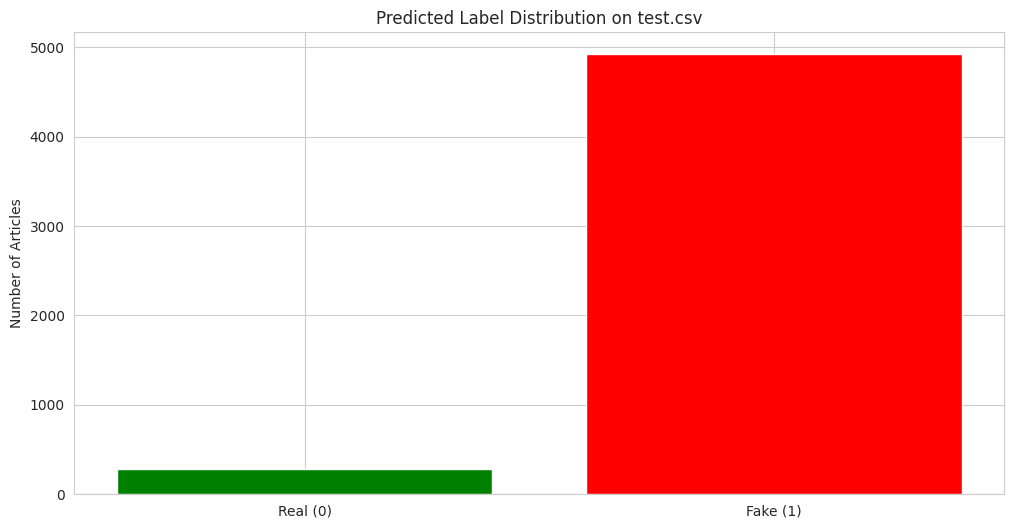

In [43]:
import matplotlib.pyplot as plt

# Count predicted labels
import numpy as np
unique, counts = np.unique(predictions, return_counts=True)

plt.bar(['Real (0)', 'Fake (1)'], counts, color=['green', 'red'])
plt.title('Predicted Label Distribution on test.csv')
plt.ylabel('Number of Articles')
plt.show()


In [44]:
# Combine predictions with text
test_df['predicted_label'] = predictions

# Show sample of predicted fake news
print("🔥 Predicted as FAKE news:")
print(test_df[test_df['predicted_label'] == 1][['title', 'text']].head(3))

# Show sample of predicted real news
print("✅ Predicted as REAL news:")
print(test_df[test_df['predicted_label'] == 0][['title', 'text']].head(3))


🔥 Predicted as FAKE news:
                                               title  \
0  Specter of Trump Loosens Tongues, if Not Purse...   
1  Russian warships ready to strike terrorists ne...   
2  #NoDAPL: Native American Leaders Vow to Stay A...   

                                                text  
0  PALO ALTO, Calif.  —   After years of scorning...  
1  Russian warships ready to strike terrorists ne...  
2  Videos #NoDAPL: Native American Leaders Vow to...  
✅ Predicted as REAL news:
                                                title  \
36  Krauthammer: Gorsuch Filibuster a ’Totally Ill...   
41  Trump: Confidence In Economy ’Has Reached Leve...   
83  Jennifer Palmieri and Clinton Camp Caught Hidi...   

                                                 text  
36  On Monday’s broadcast of the Fox News Channel’...  
41  During Friday’s Weekly Address, President Trum...  
83  \nRED ALERT! BIG WIKILEAKS DEVELOPMENT! CLINTO...  


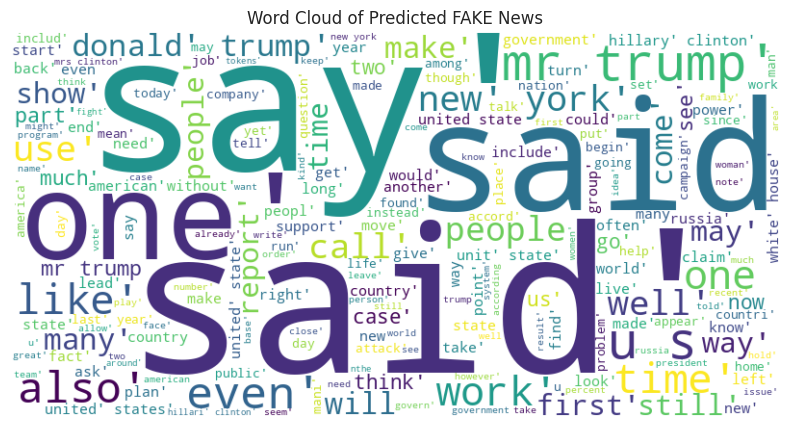

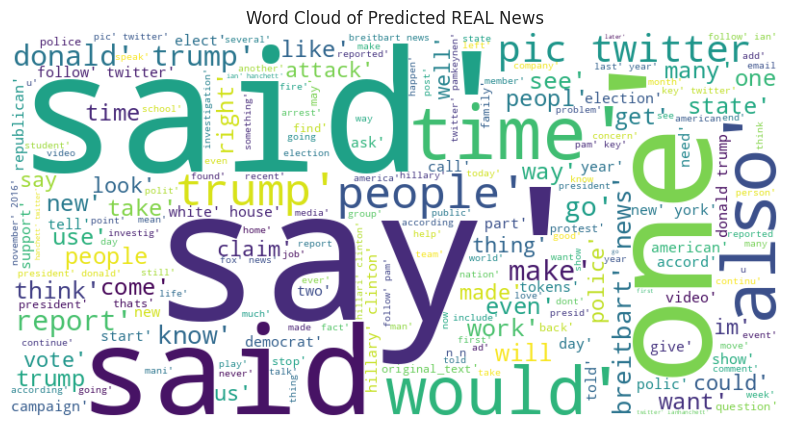

In [45]:
from wordcloud import WordCloud

# Fake news cloud
fake_text = ' '.join(test_df[test_df['predicted_label'] == 1]['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(fake_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Predicted FAKE News')
plt.show()

# Real news cloud
real_text = ' '.join(test_df[test_df['predicted_label'] == 0]['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(real_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Predicted REAL News')
plt.show()
